# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [73]:
df = pd.read_csv('../data/states_edu.csv')
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [74]:
#Sets the Enroll column to all of the grades since they should be roughly same.
df["ENROLL"] = df["GRADES_ALL_G"]

#Sets the primary school grades
df["GRADES_1_8_G"] = df["GRADES_4_G"] + df["GRADES_8_G"]

#Sets the high school grades
df["GRADES_9_12_G"] = df["GRADES_12_G"]

#Drops any column thats missing data for the average math score for 8th grade.
df.dropna(subset=["AVG_MATH_8_SCORE"], inplace=True)

#Checks to see if the enroll amount is near the same as the ones listed.
((df["ENROLL"]-df["GRADES_PK_G"]-df["GRADES_KG_G"]-df["GRADES_4_G"]-df["GRADES_8_G"]-df["GRADES_12_G"])/df["ENROLL"]*100).describe()

count    518.000000
mean      68.576196
std        1.703486
min       59.543460
25%       67.726962
50%       68.738433
75%       69.599971
max       73.507538
dtype: float64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [34]:
# @@@ 1
# Your Code
#Prints out the number of unique years that show up in the dataframe
print(df["YEAR"].nunique())

13


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [48]:
# @@@ 2

#Filters to Michigan and Ohio, groups math scores by state, and calculates the mean math score.
state_average = df[df["STATE"].isin(["MICHIGAN", "OHIO"])].groupby("STATE")["AVG_MATH_8_SCORE"].mean()
#Pulls the indexed name for the state that has the highest score
state_average_max = state_average[state_average ==state_average.max()].index[0]
print(state_average_max)

OHIO


Find the average for your chosen test across all states in 2019

In [51]:
# @@@ 3
#Filters to the year 2019 and takes the mean score across all of the states
country_avg_math_8_score = df[df["YEAR"] == 2019]["AVG_MATH_8_SCORE"].mean()
print(country_avg_math_8_score)

281.2641509433962


For each state, find a maximum value for your chosen test score

In [64]:
# @@@ 4

#Filters and groups avg math score by state, then takes the index for the max score of the state
idx = df.groupby("STATE")["AVG_MATH_8_SCORE"].idxmax()

#Uses said indices to get the rows
max_score_info = df.loc[idx, ["STATE", "YEAR", "AVG_MATH_8_SCORE"]]

print(max_score_info)

                     STATE  YEAR  AVG_MATH_8_SCORE
867                ALABAMA  2009             269.0
766                 ALASKA  2007             283.0
1175               ARIZONA  2015             283.0
972               ARKANSAS  2011             279.0
1309            CALIFORNIA  2017             277.0
974               COLORADO  2011             292.0
873            CONNECTICUT  2009             289.0
874               DELAWARE  2009             284.0
1670  DISTRICT_OF_COLUMBIA  2019             269.0
1660                 DODEA  2017             293.0
1080               FLORIDA  2013             281.0
1351               GEORGIA  2017             281.0
1082                HAWAII  2013             281.0
879                  IDAHO  2009             287.0
1084              ILLINOIS  2013             285.0
1085               INDIANA  2013             288.0
1188                  IOWA  2015             286.0
781                 KANSAS  2007             290.0
986               KENTUCKY  201

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [87]:
# @@@ 5

#Created an column for the amount spent per student
df["SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT"] = df["SUPPORT_SERVICES_EXPENDITURE"] / df["ENROLL"]

#Filters and groups avg math score by state, then takes the index for the max score of the state
idx = df.groupby("STATE")["AVG_MATH_8_SCORE"].idxmax()

#Uses said indices to get the rows
max_score_info = df.loc[idx, ["STATE", "YEAR", "SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT", "AVG_MATH_8_SCORE"]]

print(max_score_info)

                     STATE  YEAR  SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT  \
867                ALABAMA  2009                                  3.113348   
766                 ALASKA  2007                                  4.929115   
1175               ARIZONA  2015                                  2.597006   
972               ARKANSAS  2011                                  3.427108   
1309            CALIFORNIA  2017                                       NaN   
974               COLORADO  2011                                  3.283472   
873            CONNECTICUT  2009                                  4.973993   
874               DELAWARE  2009                                  3.914662   
1670  DISTRICT_OF_COLUMBIA  2019                                       NaN   
1660                 DODEA  2017                                       NaN   
1080               FLORIDA  2013                                  2.801521   
1351               GEORGIA  2017                                

Feature engineering justification: **<Added an column for the support services expenditure per student to process the raw data better. Easier to see if there is a correlation between the max score and the amount spent that year\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', ylabel='AVG_MATH_8_SCORE'>

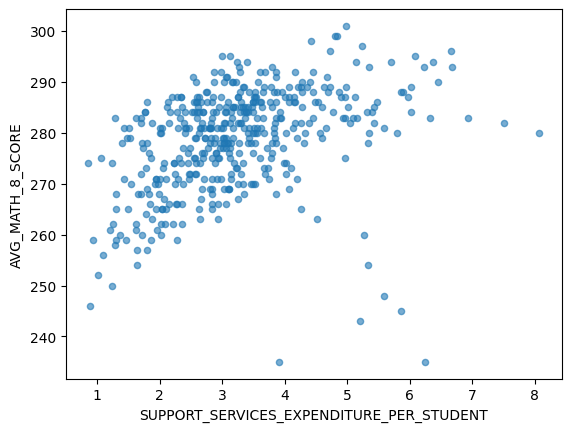

In [97]:
# @@@ 6

#Math score vs Support Services Expenditure per Student
df.plot.scatter(x="SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT", y="AVG_MATH_8_SCORE", alpha=0.6)


**<Visualization 1 shows a weak positive relationship between average math score and the support services expenditure per student. Since there is atleast some upward trend, it could hint that spending more in support services may increase the avg math score. However, the relationship is weak and the is variance the higher the expenditure is.>**

**Visualization 2**

<Axes: xlabel='TOTAL_EXPENDITURE', ylabel='AVG_MATH_8_SCORE'>

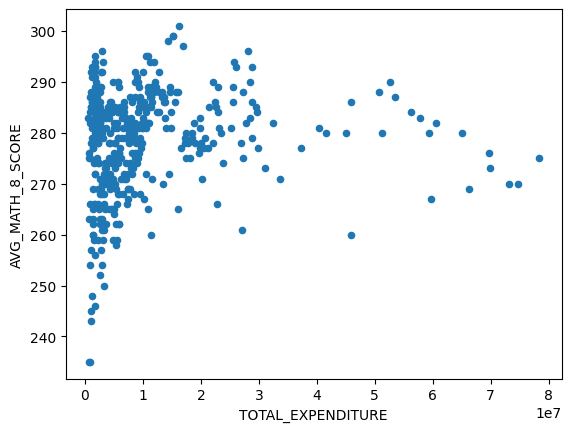

In [109]:
# @@@ 7

#Math score vs Instruction Expenditure per Student
df.plot.scatter(x="TOTAL_EXPENDITURE", y="AVG_MATH_8_SCORE")

**<Visualization 2 shows a weak, non linear relationship between Total expenditure and the average math score for 8th grade. There is some heavy clustering around 0-1 for Total expenditure with the average math score varying from as low as approx 235 to approx 296. Since there is no clear relationship, I cannot confidently identify a relationship within the graph.>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [110]:
from sklearn.model_selection import train_test_split

In [116]:
# @@@ 8

X = df[['GRADES_8_G','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','TOTAL_EXPENDITURE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [120]:
# @@@ 9 

y.fillna(y.median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [113]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [114]:
# @@@ 11
# create your model here
model = LinearRegression()

In [121]:
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [123]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [126]:
# @@@ 12

#R^2 score
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

#Mean Absolute Error
import numpy as np
print(np.mean(np.abs(model.predict(X_test)-y_test)))

#Root Mean Squared Error
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)


0.16318562251552082
0.14624941986755013
7.727744403345989
10.661581241550504


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

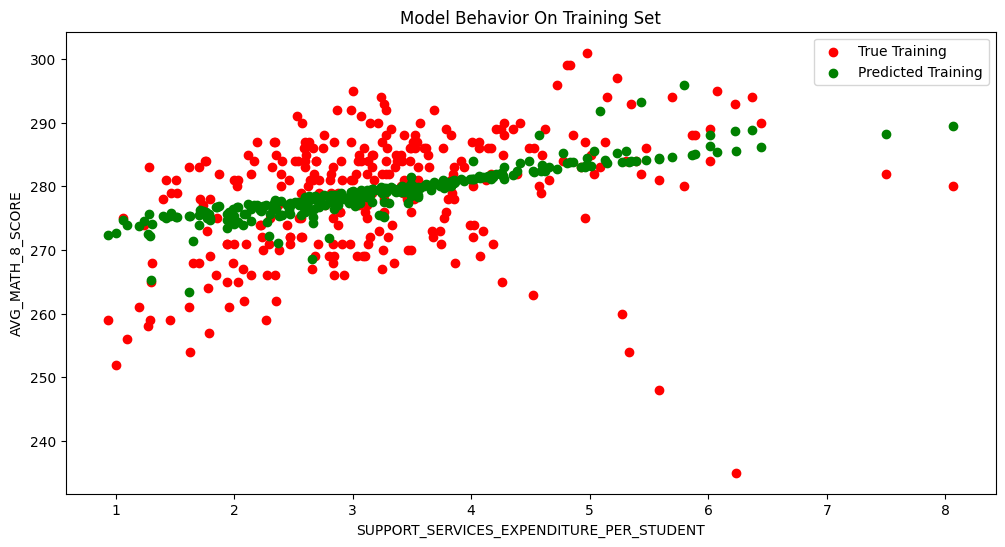

In [125]:
# @@@ 13

col_name = 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

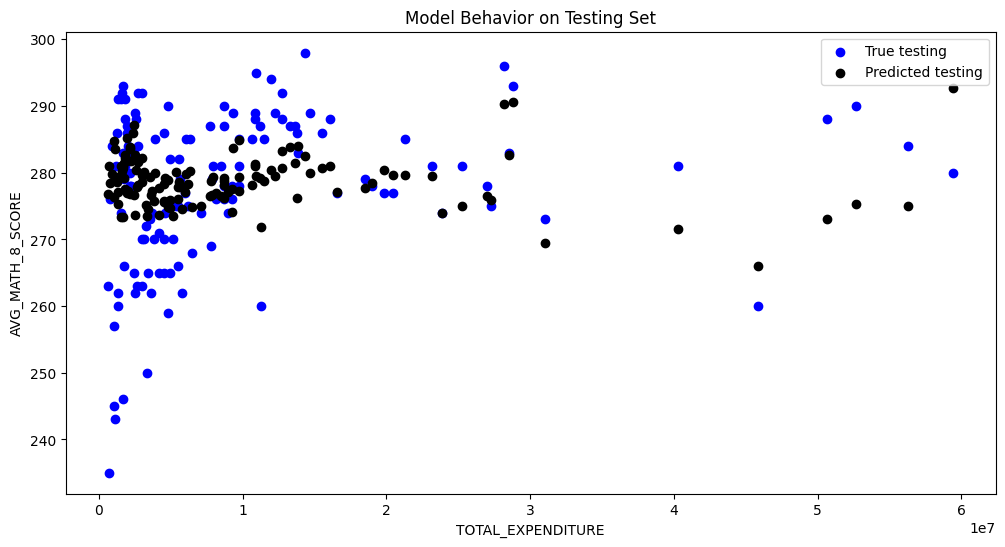

In [128]:
# @@@ 14


col_name = "TOTAL_EXPENDITURE"


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior on Testing Set")